#### Preamble

In [1]:
<< "MaTeX`"
<< "~/Documents/Wolfram/Maxima_Minima.wls"
<< "~/Documents/Wolfram/Optics_Mie.wls"
<< "~/Documents/Wolfram/Optical_functions/Au_JohnsnChristy.wls"

In [5]:
fs = 9;

texStyle := {FontFamily -> "Latin Modern Roman", FontSize -> fs, Black};
graphsOpts := {Mesh -> Full, BaseStyle -> texStyle, Frame -> True, 
            FrameStyle -> Black, ImageSize -> 215, PlotStyle -> ColorData[3]}
            
SetOptions[ListLinePlot, graphsOpts];
SetOptions[ListPlot, graphsOpts];
SetOptions[ListLogPlot, graphsOpts];

graphsOptsPolar := {Mesh -> Full, BaseStyle -> texStyle,  PolarAxes -> True ,
            FrameStyle -> Black, ImageSize -> 215, PlotStyle -> ColorData[3], Frame -> False, PolarGridLines -> Automatic, Joined -> True}
SetOptions[ListPolarPlot, graphsOptsPolar];

#### Data

In [14]:
files = FileNames["*.csv", "RawData"];
data = Import[#, "Data"]& /@ files;
data = Drop[#, 5]& /@ data;    (*Droping comments of each file*)

In [17]:
radius = 5.; (* nm *)
nNP = JohnsonChristyAuRefSize[#, radius]&;
nMat = 1.&;
 
scatteringQ[wl_] := Map[ MieScatteringQ[ {nMat[#], nNP[#]}, #, radius]&, toMap[wl] ]
extinctionQ[wl_] := Map[ MieExtinctionQ[ {nMat[#], nNP[#]}, #, radius]&, toMap[wl] ]

### No convergence

In [69]:
ii = 1;
wlength = data[[ii, ;; ,2]];
plots = { 0, 0};

sca = scatteringQ[wlength];
ext = extinctionQ[wlength];
abs = ext - sca;

RawData/0-IsolatedNP_crossSections-FEM.csv


Legended[-Graphics-, Placed[SwatchLegend[{Directive[PointSize[0.00916667], 
 
>       AbsoluteThickness[1.6], FontFamily -> Latin Modern Roman, FontSize -> 9, 
 
>       RGBColor[0., 0., 0.]], Directive[PointSize[0.00916667], AbsoluteThickness[1.6], 
 
>       FontFamily -> Latin Modern Roman, FontSize -> 9, 
 
>       RGBColor[0.996078, 0.360784, 0.027451]], 
 
>      Directive[PointSize[0.00916667], AbsoluteThickness[1.6], 
 
>       FontFamily -> Latin Modern Roman, FontSize -> 9, 
 
>       RGBColor[0.996078, 0.988235, 0.0352941]]}, 
 
>     {Q_\text{sca}\times 100, Q_\text{abs}, Q_\text{ext}}, LegendMarkers -> Automatic, 
 
>     LabelStyle -> {}, LegendLabel -> 
 
>      LineLegend[{GrayLevel[0], GrayLevel[0]}, {Mie, FEM}, LegendLayout -> Row, 
 
>       LegendMarkers -> {None, -Graphics-}, 
 
>       LegendLabel -> 5 nm-AuNP$@$Air                  ], LegendLayout -> Row], 
                       NP Max Mesh Size: $a/2$
                       Matrix Max Mesh Size: $\lambda/4$
                       PML Thickness: $\lambda/4$
 
>    {Right, Top}, Identity]]
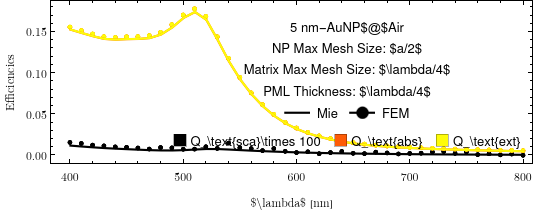

In [109]:
(* Order of the efficencies sca, abs, ext*)
Print[files[[ii]] ] (*  sca, abs, ext *)
amp = 100; (*Qext / Qsca ~ 1000*)
order = {3, 4, 5};
scadata  = 3;

parameters = {2, 4, 4}; (*Rad Mesh, Matrix Mesh,  PML Thickness*)

plots[[1]] = Show[{
    ListPlot[If[# == scadata, 
               data[[ii, ;; , {2, #}]] /. {x_, y_} -> {x, amp*y},
               (*else*)
               data[[ii, ;; , {2, #}]]
             ] & /@ order,
            FrameLabel -> { "$\\lambda$ [nm]", "Efficiencies"}, 
            PlotLegends -> Placed[
                                SwatchLegend[Automatic, 
                                {"Q_\\text{sca}\\times " <> ToString[amp], "Q_\\text{abs}", "Q_\\text{ext}"},
                                LegendLayout -> "Row",
                                LegendLabel ->  LineLegend[{Black, Black}, 
                                                              {"Mie", "FEM"}, 
                                                             LegendLayout -> "Row",
                                                             LegendMarkers -> {None, Graphics[Disk[]]},
                                                             LegendLabel ->  ToString[IntegerPart@radius]<>" nm-AuNP$@$Air\nNP Max Mesh Size: $a/"<>ToString[parameters[[1]]]<>"$\nMatrix Max Mesh Size: $\\lambda/"<>ToString[parameters[[2]]]<>"$\nPML Thickness: $\\lambda/"<>ToString[parameters[[3]]]<>"$"
                                                        ]
                                        ],
                                {Right, Top}],
            ImageSize -> 400,
            AspectRatio -> 1/2.96
    ],
  ListLinePlot[{sca*amp, abs, ext}, DataRange -> wlength[[{1,-1}]], Mesh -> None ]
  }]

-Graphics-
{0-NoConv-1.pdf, 0-NoConv-2.pdf}
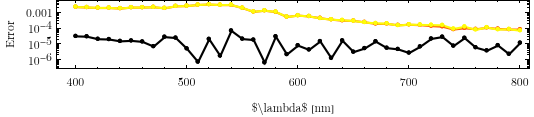

In [116]:
plots[[2]] = ListLogPlot[Which[ # == 5, Abs[ext-data[[ii, ;;, #]]],
                 # == 4, Abs[abs - data[[ii, ;;, #]]],
                 # == 3, Abs[sca - data[[ii, ;;, #]]]
        ] & /@ order,
        FrameLabel -> { "$\\lambda$ [nm]", "Error"}, 
        ImageSize -> 400,
        AspectRatio -> 1/7,
        Joined -> True,
        DataRange -> wlength[[{1,-1}]]
]

In [38]:
Export["0-NoConv-"<>ToString[#]<>".pdf", plots[[#]]]&/@Range[Length[plots]]

{0-NoConv-1.pdf, 0-NoConv-2.pdf}

### Radius Mesh

In [118]:
ii = 2;
wlength = data[[2, 1, 2]]*10^9;

ext = extinctionQ[wlength][[1]]
error = Table[{1/(i), Abs[ext - data[[ii, i, 3]]]}, {i,  Length[data[[ii, ;; , 3]]]}];

0.174343

-Graphics-
1-radius.pdf
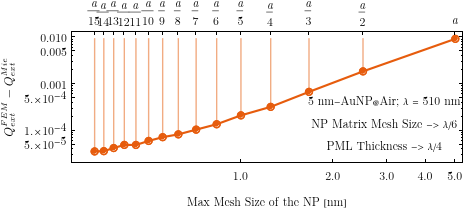

In [126]:
plots = Show[{ListLogLogPlot[error, 
        Filling -> Top, 
        PlotStyle -> Thick, 
        PlotTheme -> "Scientific", 
        Frame -> True, 
        PlotRange -> All, 
        Joined -> False, 
        FrameStyle ->  Directive[texStyle, Black], 
        FrameLabel -> {"Max Mesh Size of the NP [nm]", 
                        MaTeX["Q_{ext}^{FEM}-Q_{ext}^{Mie}", FontSize -> fs, ContentPadding -> False]}, 
        PlotMarkers -> {"OpenMarkers", 5},
        ImageSize -> 350, AspectRatio -> 1/3,
        Epilog -> {Inset[
                  Style["5 nm-AuNP@Air; \[Lambda] = 510 nm\nNP Matrix Mesh Size -> \[Lambda]/6\nPML Thickness -> \[Lambda]/4", texStyle], 
                  Scaled[{.8, .3}]]},
       FrameTicks -> {{Automatic, Automatic}, 
                       {Table[{i, NumberForm[i*5, {2, 1}]}, {i, 0.0, 1, .2}], 
                               Table[{1/i, a/(i)}, {i, Length[data[[ii, ;; , 3]]]} ]}
                    }
   ]},
 Show[ListLogLogPlot[error, PlotTheme -> "Scientific", Joined -> True]]]
 
Export["1-radius.pdf", plots]

### Matrix Mesh

In [133]:
ii = 3;
wlength = data[[2, 1, 2]]*10^9;

ext = extinctionQ[wlength][[1]];
error = Table[{1/(i+2), Abs[ext - data[[ii, i, 3]]]}, {i, Length[data[[ii, ;; , 3]]]}];

-Graphics-
2-matrix.pdf
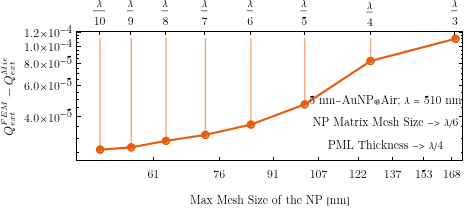

In [143]:
plots = Show[{ListLogLogPlot[error, 
        Filling -> Top, 
        PlotStyle -> Thick, 
        PlotTheme -> "Scientific", 
        Frame -> True, 
        PlotRange -> Full,
        Joined -> False, 
        FrameStyle ->  Directive[texStyle, Black], 
        FrameLabel -> {"Max Mesh Size of the NP [nm]", 
                        MaTeX["Q_{ext}^{FEM}-Q_{ext}^{Mie}", FontSize -> fs, ContentPadding -> False]}, 
        PlotMarkers -> {"OpenMarkers", 5},
        ImageSize -> 350, AspectRatio -> 1/3,
        Epilog -> {Inset[
                  Style["5 nm-AuNP@Air; \[Lambda] = 510 nm\nNP Matrix Mesh Size -> \[Lambda]/6\nPML Thickness -> \[Lambda]/4", texStyle], 
                  Scaled[{.8, .3}]]},
       FrameTicks -> {{Automatic,   Automatic}, 
                       {Table[{i, IntegerPart[i*510]}, {i, 0.0, .34, .03}], 
                       Table[{1/(2 + i), \[Lambda]/(i + 2)}, {i, Length[data[[ii, ;; , 3]]]}]
                       }}
   ]},
 Show[ListLogLogPlot[error, PlotTheme -> "Scientific", Joined -> True, PlotRange -> Full]]]
 
 Export["2-matrix.pdf", plots]